<a href="https://colab.research.google.com/github/fabianoseller/PucPosEstat/blob/main/Trabalho_Final_Descritiva_e_Probabilidade_Versao_20250609.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho Final Descritiva e Probabilidade
Alunos: Felipe Magno, Fabiano Antunes, Gabrila Araujo,  Helder Vaz

## Foi escolhido aleatoriamente o curso 6208
CO_GRUPO==6208  [6208 = Engenharia de Produção]


Instalando e Carregando Pacotes

In [ ]:
vetor_pacotes=c("readr",
                "ggplot2",
                "plotly",
                "e1071",
                "dplyr",
                "Hmisc",
                "DescTools",
                "esquisse",
                "kableExtra",
                "gridExtra",
                "devtools"
)
install.packages(vetor_pacotes)

lapply(vetor_pacotes,
       require,
       character.only = TRUE)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’, ‘reactR’, ‘R.utils’, ‘checkmate’, ‘rootSolve’, ‘lmom’, ‘classInt’, ‘reactable’, ‘rio’, ‘toastui’, ‘writexl’, ‘lazyeval’, ‘crosstalk’, ‘proxy’, ‘htmlTable’, ‘viridis’, ‘colorspace’, ‘Formula’, ‘mvtnorm’, ‘expm’, ‘Exact’, ‘gld’, ‘datamods’, ‘phosphoricons’, ‘shinybusy’, ‘shinyWidgets’, ‘svglite’


Loading required package: readr

Loading required package: ggplot2

Loading required package: plotly


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Loading required package: e1071

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

In [ ]:
enade2017 = read_csv2("MICRODADOS_ENADE_2017.txt")

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 24015 Columns: 150
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (56): TP_SEXO, DS_VT_GAB_OFG_ORIG, DS_VT_GAB_OFG_FIN, DS_VT_GAB_OCE_ORIG...
dbl (94): NU_ANO, CO_IES, CO_CATEGAD, CO_ORGACAD, CO_GRUPO, CO_CURSO, CO_MOD...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Importacao do banco do ENADE/INEP

In [ ]:
head(enade2017)

NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,⋯,QE_I72,QE_I73,QE_I74,QE_I75,QE_I76,QE_I77,QE_I78,QE_I79,QE_I80,QE_I81
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2017,1,1,10028,5710,3,1,5103403,51,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2017,1,1,10028,5710,3,1,5103403,51,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2017,1,1,10028,5710,3,1,5103403,51,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2017,1,1,10028,5710,3,1,5103403,51,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2017,1,1,10028,5710,3,1,5103403,51,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2017,1,1,10028,5710,3,1,5103403,51,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Selecionando variaveis

In [ ]:

microdados_enade_filtrados= enade2017 %>% dplyr::select(CO_GRUPO,
                                                       TP_SEXO,
                                                       CO_TURNO_GRADUACAO,
                                                       QE_I02,
                                                       NT_OBJ_FG,
                                                       QE_I08,
                                                       QE_I23,
                                                       NT_GER
)

microdados_ti = microdados_enade_filtrados %>% filter(CO_GRUPO==6208)

Varrendo vetor e fazendo uma equivalencia lógica... 0 ou 1

In [ ]:
microdados_enade_filtrados$CO_GRUPO == 6208

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

RESULTADO DE EQUIVALENCIA LÓGICA, se é 6208

In [ ]:
dim (microdados_enade_filtrados)

[1] 237060     10

7 Colunas

In [ ]:
microdados_ti = microdados_enade_filtrados %>% filter(CO_GRUPO==6208)

In [ ]:
head(microdados_ti)

CO_GRUPO,TP_SEXO,CO_TURNO_GRADUACAO,QE_I02,NT_OBJ_FG,QE_I08,QE_I23,NT_GER
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
6208,M,3,A,62.5,E,E,55.6
6208,F,3,A,87.5,F,E,72.6
6208,F,3,C,87.5,E,B,50.3
6208,F,3,C,87.5,F,B,45.2
6208,M,3,C,75.0,F,C,40.9
6208,F,3,A,75.0,C,C,62.5


Testando método unique para variavel CO_GRUPO

In [ ]:
unique(microdados_ti$CO_GRUPO)

[1] 6208

Teste do numero de linhas do CO GRUPO (QUANTIDADE DE COLUNAS)

In [ ]:
table(microdados_ti$CO_GRUPO)


6208 
8869 

*Transformação de variaveis usando o Mutate (criando coluna nao DataFrame)*(usando case - when)

In [ ]:
# Selecionando variaveis
microdados_enade_filtrados = enade2017 %>% dplyr::select(CO_GRUPO,
                                                        TP_SEXO,
                                                        CO_TURNO_GRADUACAO,
                                                        QE_I02,
                                                        NT_OBJ_FG,
                                                        QE_I08,
                                                        QE_I23,
                                                        CO_REGIAO_CURSO,
                                                        NT_OBJ_CE,
                                                        NT_GER
)

# The rest of your code for mutating the dataframe follows:
microdados_ti = microdados_enade_filtrados %>% filter(CO_GRUPO==6208)

microdados_ti = microdados_ti %>% mutate(raca = case_when( QE_I02 == "A" ~ "Branca",
                                                                    QE_I02 == "B" ~ "Preta",
                                                                    QE_I02 == "C" ~ "Amarela",
                                                                    QE_I02 == "D" ~ "Parda",
                                                                    QE_I02 == "E" ~ "Indígena",
														                                  			QE_I02 == "E" ~ "Não quero declarar"

))

microdados_ti = microdados_ti %>% mutate(regiao = case_when( CO_REGIAO_CURSO == 1 ~ "Norte",
                                                             CO_REGIAO_CURSO == 2 ~ "Nordeste",
                                                             CO_REGIAO_CURSO == 3 ~ "Sudeste",
                                                             CO_REGIAO_CURSO == 4 ~ "Sul",
                                                             CO_REGIAO_CURSO == 5 ~ "Centro-Oeste"
))

#sexo
microdados_ti = microdados_ti %>% mutate(sexo = case_when( TP_SEXO == "M" ~ "Masculino",
                                                           TP_SEXO == "F" ~ "Feminino"
))

microdados_ti = microdados_ti %>% mutate(hestudos = case_when( QE_I23 == "A" ~ "Nenhuma, apenas assisto as aulas",
                                                               QE_I23 == "B" ~ "De uma a três",
                                                               QE_I23 == "C" ~ "De quatro a sete",
                                                               QE_I23 == "D" ~ "De oito a doze",
                                                               QE_I23 == "E" ~ "Mais de doze"
))

microdados_ti = microdados_ti %>% mutate(hsalario = case_when(   QE_I08 == "A" ~ "Até 1,5 salário mínimo (até R$ 1.405,50)",
                                                                 QE_I08 == "B" ~ "De 1,5 a 3 salários mínimos (R$ 1.405,51 a R$ 2.811,00)",
                                                                 QE_I08 == "C" ~ "De 3 a 4,5 salários mínimos (R$ 2.811,01 a R$ 4.216,50)",
                                                                 QE_I08 == "D" ~ "De 4,5 a 6 salários mínimos (R$ 4.216,51 a R$ 5.622,00)",
                                                                 QE_I08 == "E" ~ "De 6 a 10 salários mínimos (R$ 5.622,01 a R$ 9.370,00)",
                                                                 QE_I08 == "F" ~ "De 10 a 30 salários mínimos (R$ 9.370,01 a R$ 28.110,00)",
                                                                 QE_I08 == "G" ~ "Acima de 30 salários mínimos (mais de R$ 28.110,00)"
))

# Corrected variable name from QE_174 to CO_TURNO_GRADUACAO as per selected columns
microdados_ti = microdados_ti %>% mutate(hturno = case_when(  CO_TURNO_GRADUACAO == 1 ~ "Matutino",
                                                                CO_TURNO_GRADUACAO == 2 ~ "Vespertino",
                         									                    	CO_TURNO_GRADUACAO == 3 ~ "Noturno",
															                                  CO_TURNO_GRADUACAO == 4 ~ "Integral",
														                                		CO_TURNO_GRADUACAO == 5 ~ "Não realizei estágio curricular obrigatório"


))

In [ ]:
unique(microdados_ti$raca)
unique(microdados_ti$hturno)

[1] "Branca"   "Amarela"  NA         "Parda"    "Preta"    "Indígena"

[1] "Noturno"    "Integral"   "Matutino"   "Vespertino"

Teste comando missing

In [ ]:
describe(microdados_ti$raca)
describe(microdados_ti$hturno)


microdados_ti$raca 
       n  missing distinct 
    7859     1010        5 
                                                       
Value       Amarela   Branca Indígena    Parda    Preta
Frequency       206     5461       16     1739      437
Proportion    0.026    0.695    0.002    0.221    0.056

microdados_ti$hturno 
       n  missing distinct 
    8869        0        4 
                                                      
Value        Integral   Matutino    Noturno Vespertino
Frequency        5883        810       1993        183
Proportion      0.663      0.091      0.225      0.021

In [ ]:
sum(is.na(microdados_ti$hturno))

[1] 0

Teste usando sumarize

In [ ]:
#Removendo  Na´S De todas As variáveis que possuem NA
microdados_ti_sem_NA=microdados_ti %>% na.omit()

In [ ]:
resumo_teste_variaveis= microdados_ti %>%
  select(everything()) %>%
  summarise_all(list(~sum(is.na(.))))
 resumo_teste_variaveis

CO_GRUPO,TP_SEXO,CO_TURNO_GRADUACAO,QE_I02,NT_OBJ_FG,QE_I08,QE_I23,CO_REGIAO_CURSO,NT_OBJ_CE,NT_GER,raca,regiao,sexo,hestudos,hsalario,hturno
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,827,1086,827,827,0,1086,1086,1010,0,0,827,827,0


#Removendo  Na´S De todas As variáveis que possuem NA
microdados_ti_sem_NA=microdados_ti %>% na.omit()

In [ ]:
microdados_ti_sem_NA=microdados_ti %>% na.omit()

.Data quality, evitando valores faltantes. Is na. procura se tem NA OU NÃO

In [ ]:
APLICA SOMA DO TRUE OU FALSE

In [ ]:
#Verificando de foram retirados os NA´S
resumo_nas=microdados_ti_sem_NA %>%
  select(everything()) %>%
  summarise_all(list(~sum(is.na(.))))
resumo_teste_variaveis

CO_GRUPO,TP_SEXO,CO_TURNO_GRADUACAO,QE_I02,NT_OBJ_FG,QE_I08,QE_I23,CO_REGIAO_CURSO,NT_OBJ_CE,NT_GER,raca,regiao,sexo,hestudos,hsalario,hturno
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,827,1086,827,827,0,1086,1086,1010,0,0,827,827,0


Número de linhas que ficaram SEm N/A

In [ ]:
dim(microdados_ti)[1] - dim(microdados_ti_sem_NA)[1]

[1] 4087

In [ ]:
# Selecionando variaveis
microdados_enade_filtrados = enade2017 %>% dplyr::select(CO_GRUPO,
                                                       TP_SEXO,
                                                       CO_TURNO_GRADUACAO,
                                                       QE_I02,
                                                       NT_OBJ_FG,
                                                       QE_I08,
                                                       QE_I23,
                                                       CO_REGIAO_CURSO,
                                                       NT_OBJ_CE # Adicionado NT_OBJ_CE aqui
)

# O resto do seu código para mutar o dataframe segue:
microdados_ti = microdados_enade_filtrados %>% filter(CO_GRUPO==6208)

microdados_ti = microdados_ti %>% mutate(raca = case_when( QE_I02 == "A" ~ "Branca",
                                                                    QE_I02 == "B" ~ "Preta",
                                                                    QE_I02 == "C" ~ "Amarela",
                                                                    QE_I02 == "D" ~ "Parda",
                                                                    QE_I02 == "E" ~ "Indígena",
														                                  			QE_I02 == "F" ~ "Não quero declarar" # Corrigido de E para F aqui

))

microdados_ti = microdados_ti %>% mutate(regiao = case_when( CO_REGIAO_CURSO == 1 ~ "Norte",
                                                             CO_REGIAO_CURSO == 2 ~ "Nordeste",
                                                             CO_REGIAO_CURSO == 3 ~ "Sudeste",
                                                             CO_REGIAO_CURSO == 4 ~ "Sul",
                                                             CO_REGIAO_CURSO == 5 ~ "Centro-Oeste"
))

#sexo
microdados_ti = microdados_ti %>% mutate(sexo = case_when( TP_SEXO == "M" ~ "Masculino",
                                                           TP_SEXO == "F" ~ "Feminino"
))

microdados_ti = microdados_ti %>% mutate(hestudos = case_when( QE_I23 == "A" ~ "Nenhuma, apenas assisto as aulas",
                                                               QE_I23 == "B" ~ "De uma a três",
                                                               QE_I23 == "C" ~ "De quatro a sete",
                                                               QE_I23 == "D" ~ "De oito a doze",
                                                               QE_I23 == "E" ~ "Mais de doze"
))

microdados_ti = microdados_ti %>% mutate(hsalario = case_when(   QE_I08 == "A" ~ "Até 1,5 salário mínimo (até R$ 1.405,50)",
                                                                 QE_I08 == "B" ~ "De 1,5 a 3 salários mínimos (R$ 1.405,51 a R$ 2.811,00)",
                                                                 QE_I08 == "C" ~ "De 3 a 4,5 salários mínimos (R$ 2.811,01 a R$ 4.216,50)",
                                                                 QE_I08 == "D" ~ "De 4,5 a 6 salários mínimos (R$ 4.216,51 a R$ 5.622,00)",
                                                                 QE_I08 == "E" ~ "De 6 a 10 salários mínimos (R$ 5.622,01 a R$ 9.370,00)",
                                                                 QE_I08 == "F" ~ "De 10 a 30 salários mínimos (R$ 9.370,01 a R$ 28.110,00)",
                                                                 QE_I08 == "G" ~ "Acima de 30 salários mínimos (mais de R$ 28.110,00)"
))

# Corrigido o nome da variável de QE_174 para CO_TURNO_GRADUACAO conforme as colunas selecionadas
microdados_ti = microdados_ti %>% mutate(hturno = case_when(    CO_TURNO_GRADUACAO == 1 ~ "Matutino",
                                                                CO_TURNO_GRADUACAO == 2 ~ "Vespertino",
                         									                    	CO_TURNO_GRADUACAO == 3 ~ "Noturno",
															                                  CO_TURNO_GRADUACAO == 4 ~ "Integral"



))

INCLUIDO para o calculo: NT_OBJ_FG,

In [ ]:
#Removendo  Na´S De todas As variáveis que possuem NA
microdados_ti_sem_NA=microdados_ti %>% na.omit()

# Teste usando sumarize
microdados_ti_sem_NA %>%
  select(NT_OBJ_CE) %>%
  summarise(  quantidade=n(),
              media = mean(NT_OBJ_CE),
              mediana = median(NT_OBJ_CE),
              moda=Mode(NT_OBJ_CE),
              cv=sd(NT_OBJ_CE)/media*100,
              assimetria=skewness(NT_OBJ_CE),
              curtose=kurtosis(NT_OBJ_CE),
              primeiro_quartil = quantile(NT_OBJ_CE,0.25),
              terceiro_quartil = quantile(NT_OBJ_CE,0.75),
  ) %>%
  arrange(desc(mediana))

quantidade,media,mediana,moda,cv,assimetria,curtose,primeiro_quartil,terceiro_quartil
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7554,44.84292,45.5,40.9,37.18211,0.2623555,-0.2149774,31.8,54.5


Nota objetiva sem NA. ENADE, um composto. Nãoestamso com a ponderação geral, criando dados de formatação, media minima, mediana, desvio pedrão, assimentria perarson, 1. quartil (25%)e tercceiro quartil (75%)Ordenado pelo "arrange", Tipo sort"" E ordenando em ordem decrescente Maior para menor.


Interpretação dos Resultados da Prova
A tabela apresentada resume estatísticas descritivas das notas de uma prova para um conjunto de 22.092 participantes. Veja a interpretação dos principais indicadores:

quantidade: 22.092 alunos participaram da prova.

média: A nota média foi 41,74 pontos, indicando o desempenho médio do grupo.

mediana: A mediana foi 40,9 pontos, mostrando que metade dos alunos tirou nota abaixo e metade acima desse valor.

moda: A nota mais frequente foi 36,4 pontos.

coeficiente de variação (cv): 37,46% indica uma dispersão relativamente alta das notas em relação à média.

assimetria: 0,33 sugere uma leve assimetria à direita, ou seja, há uma cauda maior de notas altas.

curtose: -0,07 indica que a distribuição das notas é próxima da normal, sem caudas muito acentuadas.

primeiro quartil: 25% dos alunos tiraram até 31,8 pontos.

terceiro quartil: 75% dos alunos tiraram até 50 pontos.

Resumo
A maioria dos alunos obteve notas entre 31,8 e 50 pontos.

A distribuição das notas é relativamente simétrica, com leve tendência a notas mais altas.

A dispersão das notas é considerável, sugerindo diferenças significativas de desempenho entre os alunos.

A moda (nota mais comum) está abaixo da média, o que pode indicar que muitos alunos tiveram desempenho um pouco abaixo do desempenho médio geral.

In [ ]:
#Estatísticas resumo
summary(microdados_ti_sem_NA$NT_OBJ_CE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   31.80   45.50   44.84   54.50  100.00 

## Gráficos da análise descritiva para a variável nota dos alunos escolhido aleatoriamente o curso 6208 [6208 = Engenharia de Produção]


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


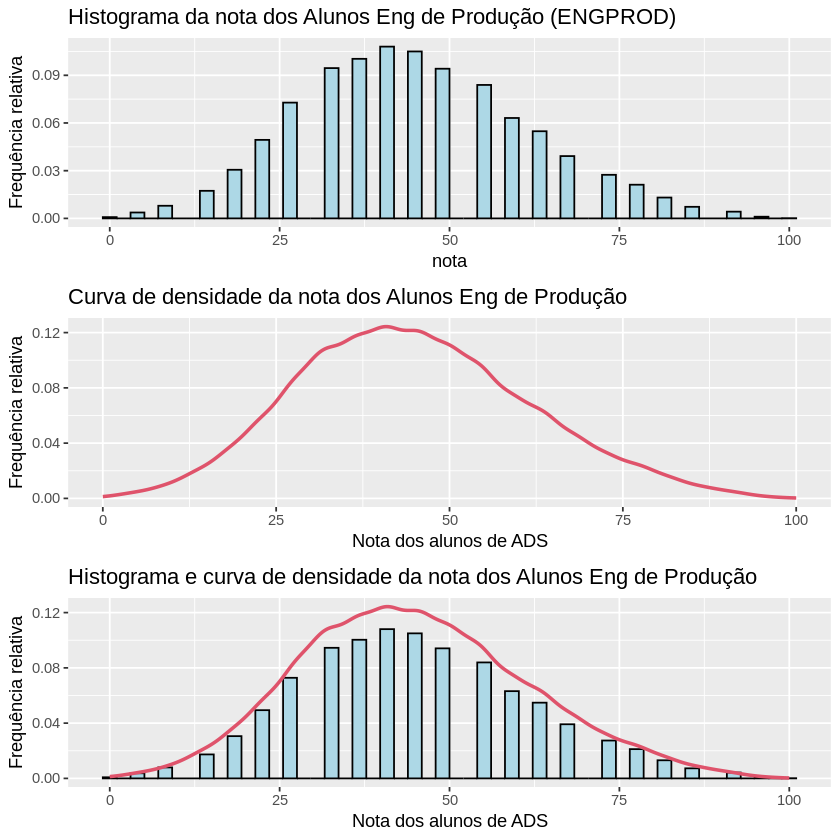

In [ ]:
g_hist=ggplot(microdados_ti_sem_NA,aes(x=NT_OBJ_CE)) +
  geom_histogram(color = "black",fill="lightblue",bins =50,aes(y=(..count..)/sum(..count..)))+
  ggtitle("Histograma da nota dos Alunos Eng de Produção (ENGPROD) ")+
  xlab("nota") +
  ylab("Frequência relativa")

g_densidade=ggplot(microdados_ti_sem_NA,aes(x=NT_OBJ_CE))+
  geom_density(col=2,size = 1, aes(y = 27 * (..count..)/sum(..count..))) +
  ggtitle("Curva de densidade da nota dos Alunos Eng de Produção") +
  xlab("Nota dos alunos de ADS") +
  ylab("Frequência relativa")

g_hist_densidade = ggplot(microdados_ti_sem_NA,aes(x=NT_OBJ_CE)) +
  geom_histogram(color = "black",fill="lightblue",bins =50,aes(y=(..count..)/sum(..count..)))+
  geom_density(col=2,size = 1, aes(y = 27 * (..count..)/sum(..count..))) +
  ggtitle("Histograma e curva de densidade da nota dos Alunos Eng de Produção")+
  xlab("Nota dos alunos de ADS") +
  ylab("Frequência relativa")

grid.arrange( g_hist,
              g_densidade,
              g_hist_densidade,
              nrow=3,ncol=1)


Attaching package: ‘scales’


The following object is masked from ‘package:readr’:

    col_factor




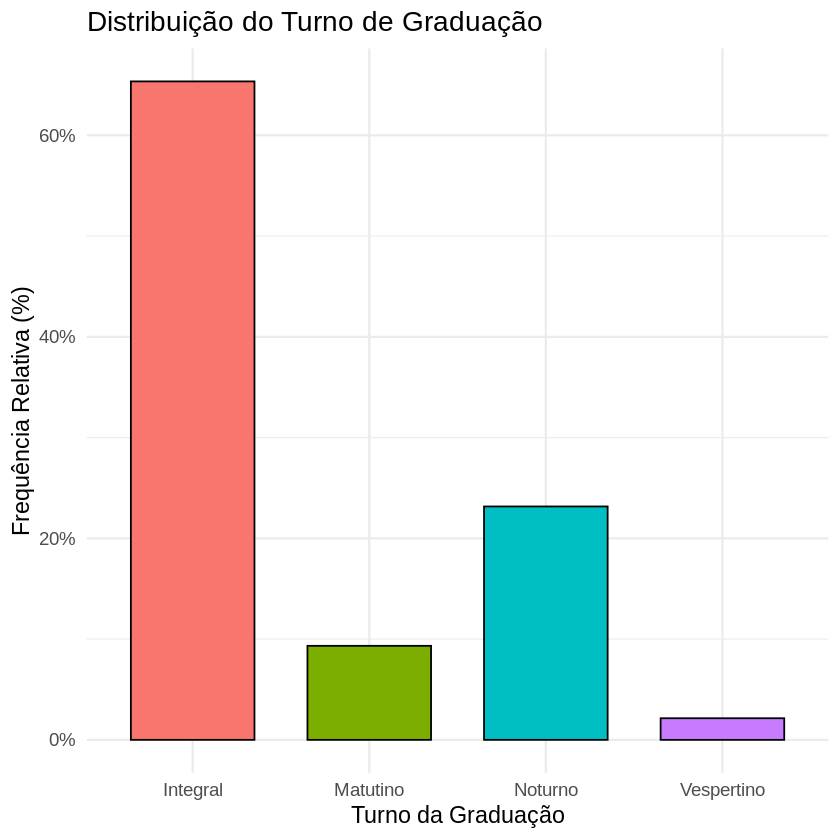

In [ ]:
library(ggplot2)
library(dplyr)
library(scales) # Need to import scales for scales::percent_format

# Se já criou a variável com rótulos descritivos:
# microdados_ti_sem_NA$turno_estagio

# Caso ainda não tenha criado:
microdados_ti_sem_NA <- microdados_ti_sem_NA %>%
  # Replace QE_174 with CO_TURNO_GRADUACAO and adjust the cases
  mutate(turno_estagio = case_when(
    CO_TURNO_GRADUACAO == 1 ~ "Matutino",
    CO_TURNO_GRADUACAO == 2 ~ "Vespertino",
    CO_TURNO_GRADUACAO == 3 ~ "Noturno",
    CO_TURNO_GRADUACAO == 4 ~ "Integral"
    # Removed the "Não realizou estágio" case as it does not correspond to CO_TURNO_GRADUACAO values 1-4
  ))

# Gráfico de barras com frequência relativa
ggplot(microdados_ti_sem_NA, aes(x = turno_estagio, fill = turno_estagio)) +
  geom_bar(aes(y = after_stat(count) / sum(after_stat(count))), color = "black", width = 0.7) + # Use after_stat for newer ggplot2 versions
  scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
  labs(
    title = "Distribuição do Turno de Graduação", # Updated title to reflect the variable
    x = "Turno da Graduação", # Updated x-axis label
    y = "Frequência Relativa (%)",
    fill = "Turno"
  ) +
  theme_minimal(base_size = 14) +
  theme(legend.position = "none")

Teste:


In [ ]:
#Comparar as médias por sexo e  renda total de sua família
microdados_ti_mod2 = microdados_ti_sem_NA %>%
  select(raca ,NT_GER,hsalario) %>%
  group_by(hsalario, raca) %>%
  summarise(  quantidade=n(),
              media = mean(NT_GER,na.rm = T),
              mediana = median(NT_GER,na.rm = T),
              cv=sd(NT_GER,na.rm=T)/media*100,
              terceiro_quartil = quantile(NT_GER, 0.75),
              amplitude_interquartil=IQR(NT_GER)) %>%
              arrange(desc(mediana))

microdados_ti_mod2

`summarise()` has grouped output by 'hsalario'. You can override using the
`.groups` argument.


hsalario,raca,quantidade,media,mediana,cv,terceiro_quartil,amplitude_interquartil
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"De 10 a 30 salários mínimos (R$ 9.370,01 a R$ 28.110,00)",Amarela,41,53.87561,53.70,25.5640639,64.400,22.800
"De 1,5 a 3 salários mínimos (R$ 1.405,51 a R$ 2.811,00)",Indígena,2,52.35000,52.35,14.4528034,55.025,5.350
"Acima de 30 salários mínimos (mais de R$ 28.110,00)",Branca,338,51.00888,50.90,28.7633674,62.475,21.075
"De 10 a 30 salários mínimos (R$ 9.370,01 a R$ 28.110,00)",Branca,1098,49.83989,50.50,28.2654273,60.000,20.500
"De 10 a 30 salários mínimos (R$ 9.370,01 a R$ 28.110,00)",Parda,153,50.10392,49.80,28.2346842,59.300,19.900
"De 6 a 10 salários mínimos (R$ 5.622,01 a R$ 9.370,00)",Amarela,51,48.14706,49.70,29.1215010,59.100,20.150
"De 4,5 a 6 salários mínimos (R$ 4.216,51 a R$ 5.622,00)",Amarela,17,46.34118,47.30,43.5441218,61.600,29.300
"De 6 a 10 salários mínimos (R$ 5.622,01 a R$ 9.370,00)",Branca,1133,46.36187,46.30,29.3212390,54.900,17.900
"Acima de 30 salários mínimos (mais de R$ 28.110,00)",Amarela,6,51.16667,45.80,32.0036179,51.575,6.525


In [ ]:
#Tabulação cruzada
table(microdados_ti_sem_NA$raca,microdados_ti_sem_NA$sexo)

          
           Feminino Masculino
  Amarela       294       357
  Branca       5188      8694
  Indígena       24        34
  Parda        2239      3347
  Preta         545       905

In [ ]:
#Tabulação cruzada proporção
prop.table(table(microdados_ti_sem_NA$raca,microdados_ti_sem_NA$sexo))

          
              Feminino   Masculino
  Amarela  0.013594118 0.016507144
  Branca   0.239885329 0.401997503
  Indígena 0.001109724 0.001572109
  Parda    0.103527997 0.154760253
  Preta    0.025199982 0.041845841

In [ ]:
#assimetria e curtose
dados_casados = microdados_ti_sem_NA %>%
  select(regiao,NT_GER,sexo) %>%
  group_by(regiao, sexo) %>%
  #filter(estado_civil=="Casado(a)") %>%
  summarise(  quantidade=n(),
              media = mean(NT_GER),
              mediana = median(NT_GER),
              cv=sd(NT_GER)/media*100,
              amplitude_interquartil=IQR(NT_GER),
              assimetria=skewness(NT_GER),
              curtose=kurtosis(NT_GER)
  ) %>%

  arrange(desc(cv))

  dados_regiao_sexo

`summarise()` has grouped output by 'regiao'. You can override using the
`.groups` argument.


regiao,sexo,quantidade,media,mediana,cv,amplitude_interquartil,assimetria,curtose
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Centro-Oeste,Feminino,359,40.89721,40.20,32.44551,19.450,0.3026655,-0.32656632
Sudeste,Masculino,8718,41.93143,41.10,31.74224,18.000,0.2921599,-0.08212819
Nordeste,Masculino,1638,41.25971,40.60,30.95682,16.875,0.3469436,0.08822085
Norte,Masculino,360,38.09361,37.20,30.11112,16.525,0.3121534,-0.24629229
Nordeste,Feminino,1126,40.03623,39.20,29.79684,16.300,0.2936288,-0.24880715
Centro-Oeste,Masculino,501,41.43533,40.60,29.46085,17.300,0.1709656,-0.42258621
Sudeste,Feminino,5621,40.99854,40.20,29.38170,16.500,0.2781883,-0.02282455
Sul,Masculino,2120,44.06255,43.40,28.32051,16.900,0.2392593,-0.05272699
Norte,Feminino,230,37.16652,37.50,27.81274,12.275,0.2467891,0.09899607


Análises Gráficas - Comparando as médias por sexo e raca

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


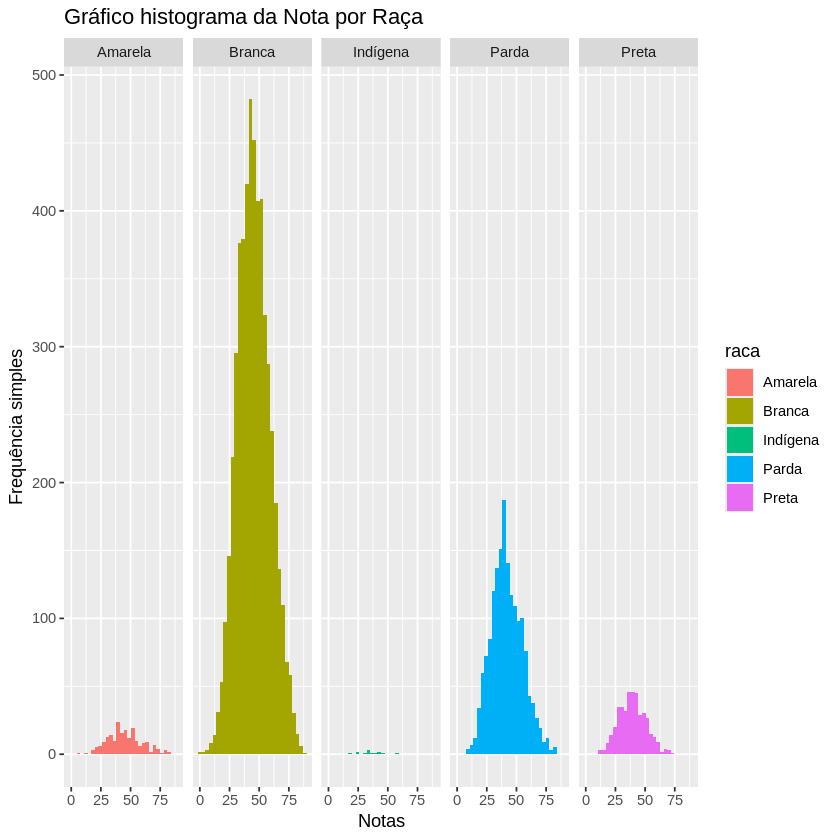

In [ ]:
dados=microdados_ti_sem_NA
grafico_histograma1 = ggplot(dados, aes(x=NT_GER,fill=raca)) +
  geom_histogram() +
  ggtitle("Gráfico histograma da Nota por Raça") +
  xlab("Notas") +
  ylab("Frequência simples") +
  facet_grid(~raca)


#ggplotly(grafico_histograma1)
grafico_histograma1

Warning message:
“Removed 3262 rows containing non-finite outside the scale range (`stat_bin()`).”


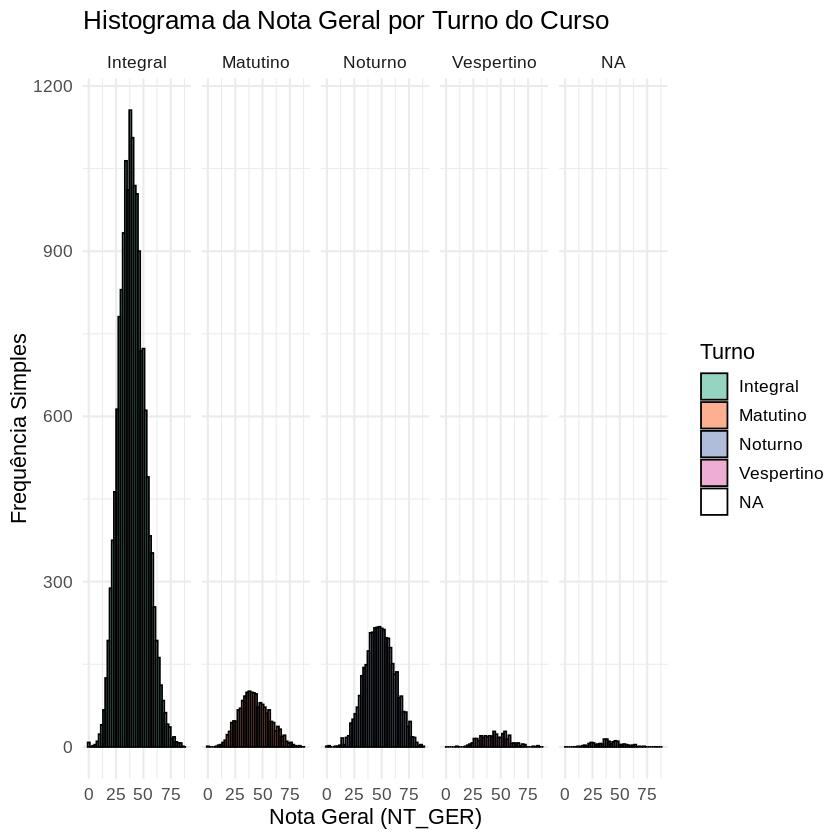

In [ ]:
library(ggplot2)

# Histograma das notas gerais por turno do curso
grafico_histograma_turno = ggplot(microdados_ti, aes(x = NT_GER, fill = hturno)) +
  geom_histogram(binwidth = 2, color = "black", alpha = 0.7, position = "identity") +
  ggtitle("Histograma da Nota Geral por Turno do Curso") +
  xlab("Nota Geral (NT_GER)") +
  ylab("Frequência Simples") +
  facet_grid(~hturno) +
  theme_minimal(base_size = 13) +
  scale_fill_brewer(palette = "Set2", name = "Turno")

grafico_histograma_turno


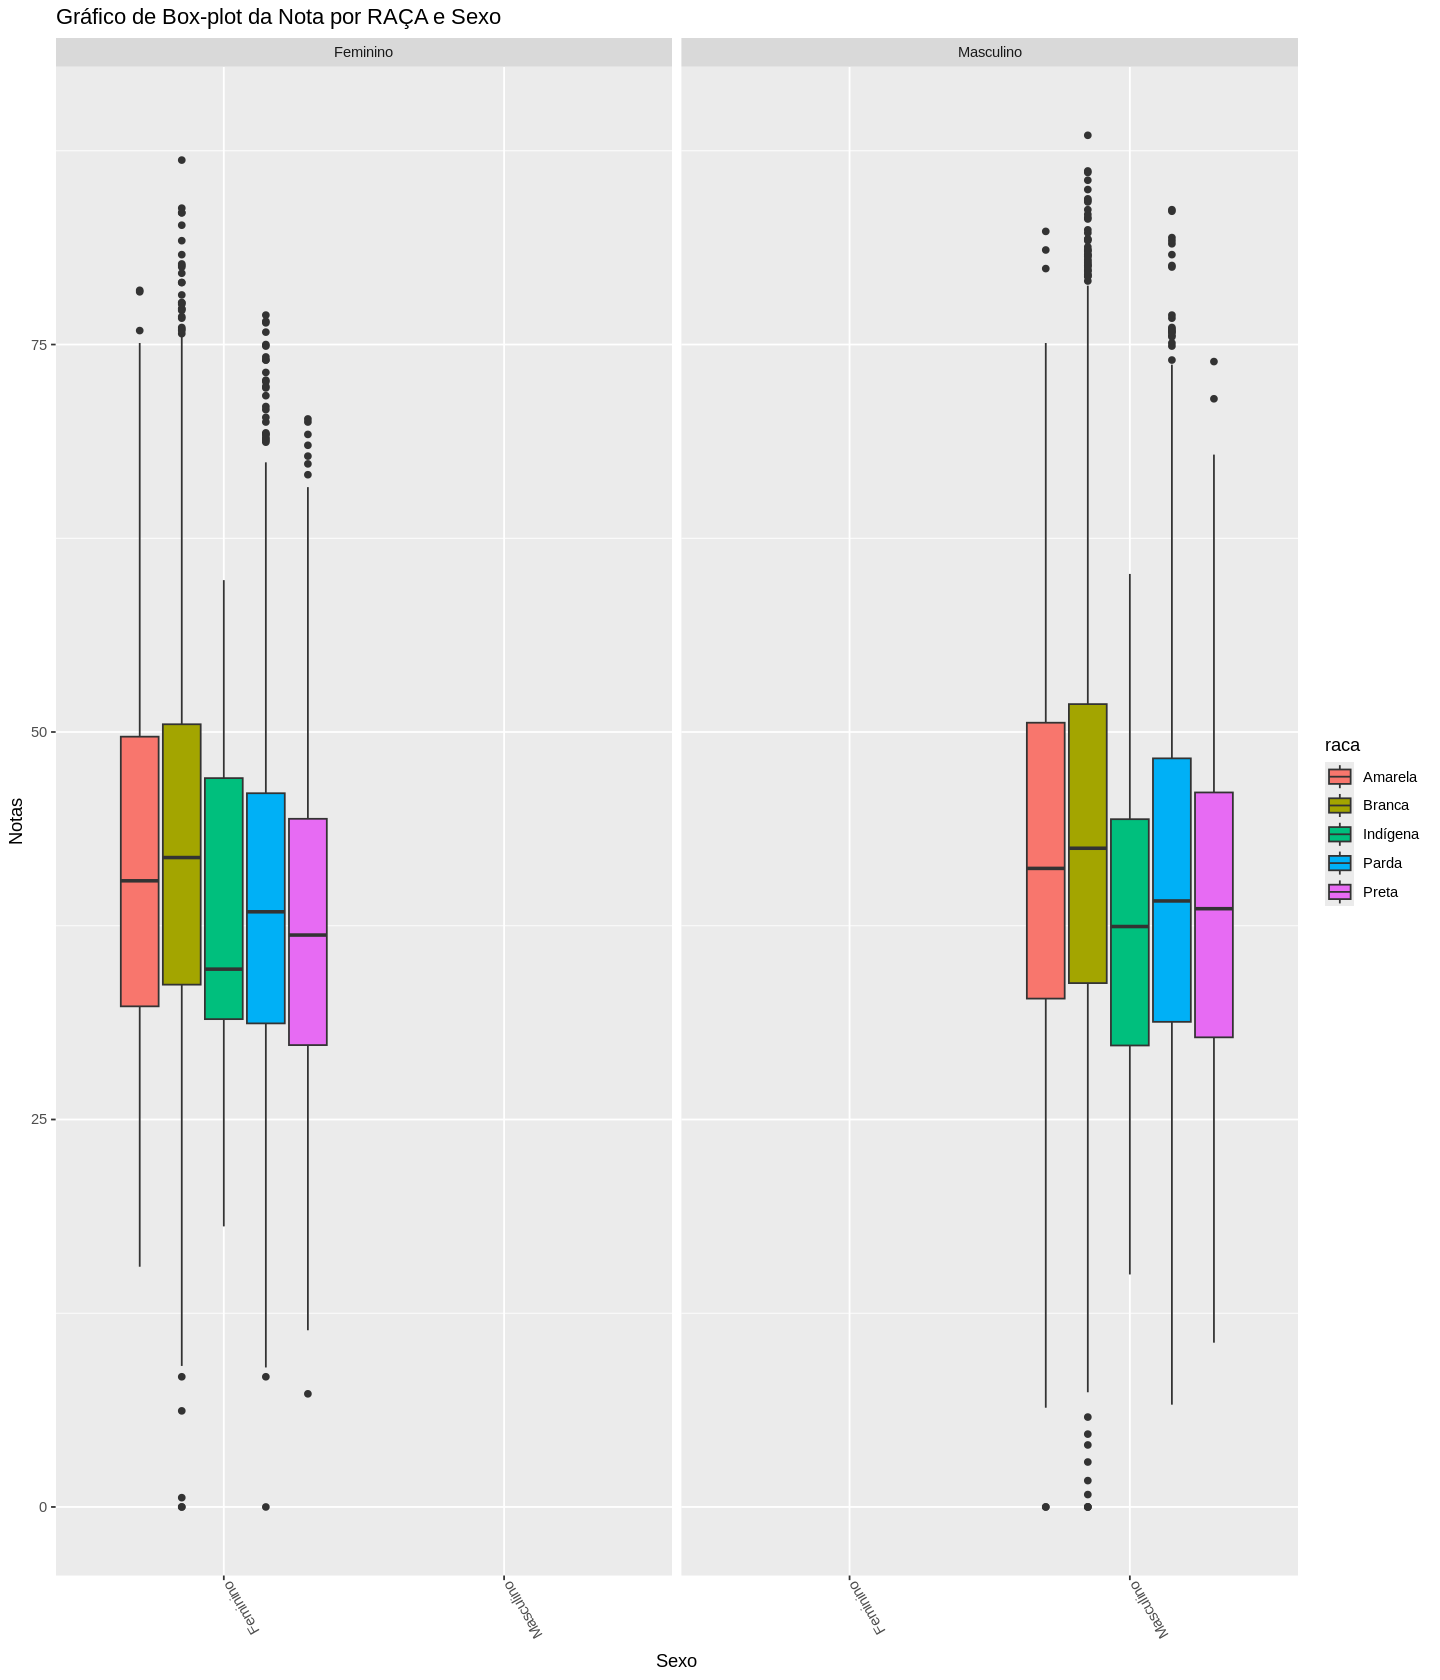

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 14)  # Ajuste os valores conforme necessário

grafico_boxplot1 = ggplot(dados, aes(x=sexo, y=NT_GER, fill=raca)) +
  geom_boxplot() +
  ggtitle("Gráfico de Box-plot da Nota por RAÇA e Sexo") +
  xlab("Sexo") +
  ylab("Notas") +
  facet_grid(~sexo) +
  theme(axis.text.x = element_text(angle = 120, vjust = 0.8, hjust=1))

grafico_boxplot1


Análises Gráficas - Comparando as médias por sexo e região

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


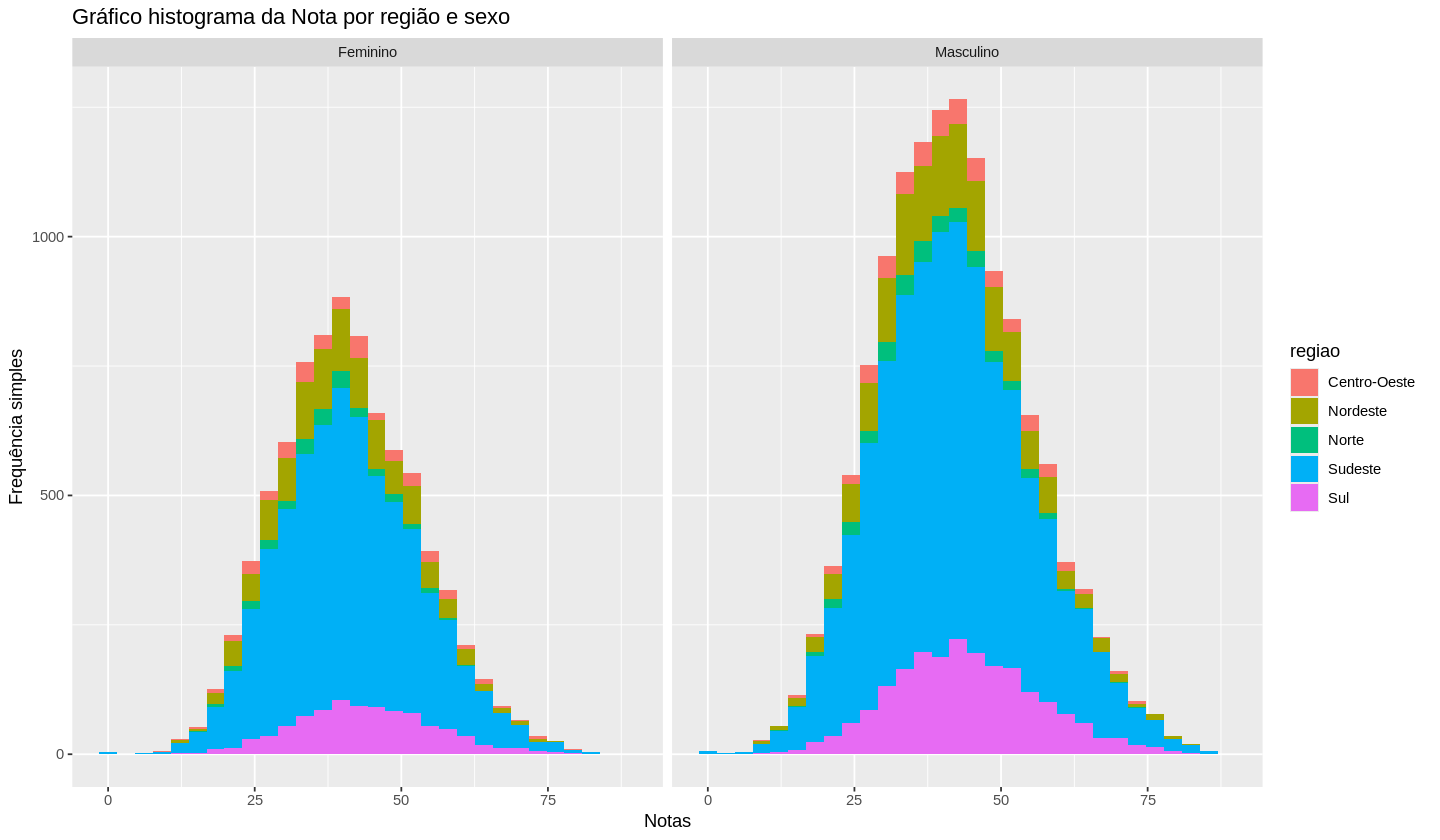

In [ ]:
#Histograma
dados=microdados_ti_sem_NA
grafico_histograma2 = ggplot(dados, aes(x=NT_GER,fill=regiao)) +
  geom_histogram()+
  ggtitle("Gráfico histograma da Nota por região e sexo" )+
  xlab("Notas") +
  ylab("Frequência simples") +
  facet_grid(~sexo)

grafico_histograma2

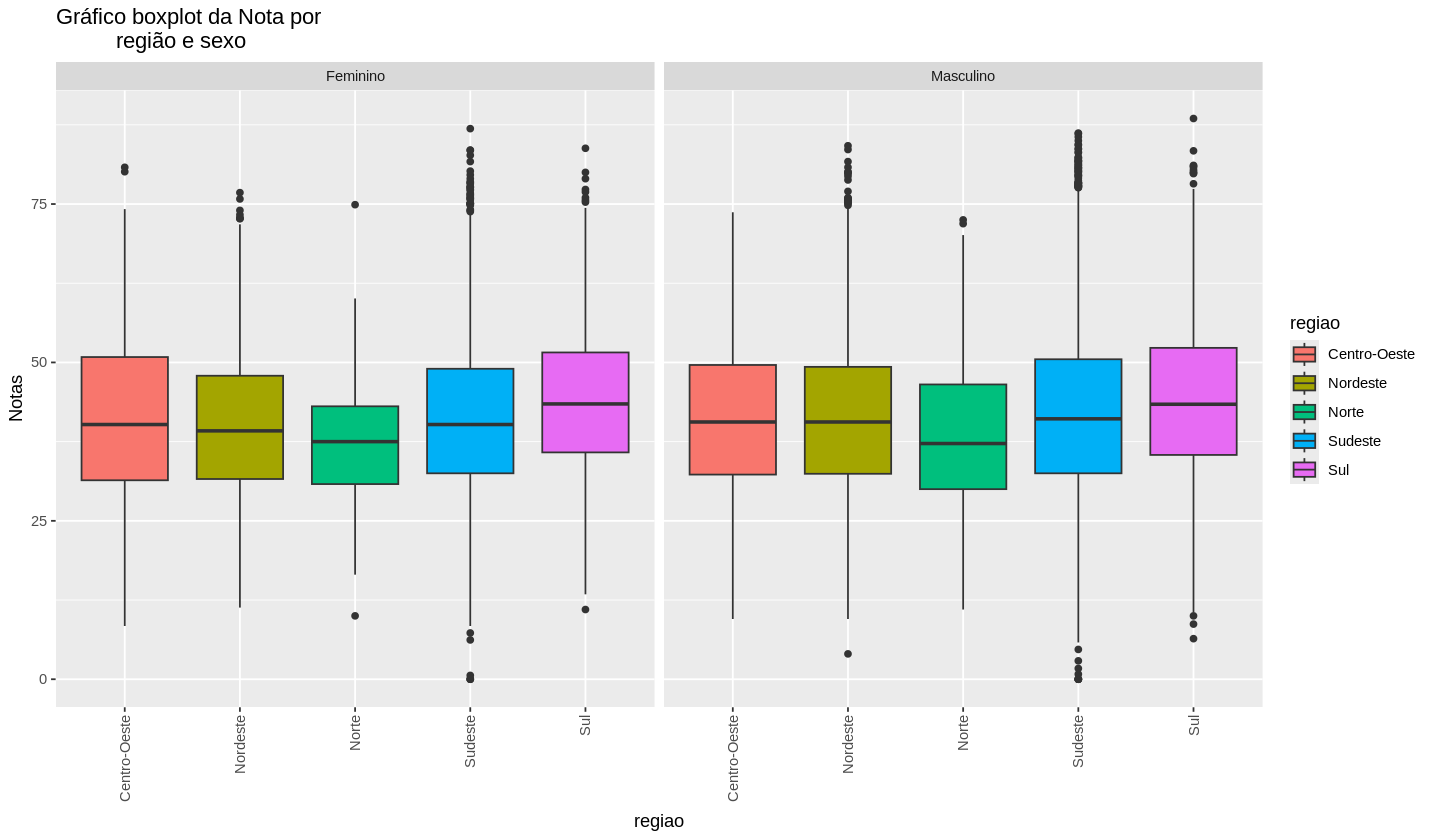

In [ ]:
#box-plot
dados=microdados_ti_sem_NA
grafico_boxplot2 = ggplot(dados, aes(x=regiao,y=NT_GER,fill=regiao)) +
  geom_boxplot() +
  ggtitle("Gráfico boxplot da Nota por
          região e sexo")+
  ylab("Notas") +
  facet_grid(~sexo)+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

grafico_boxplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


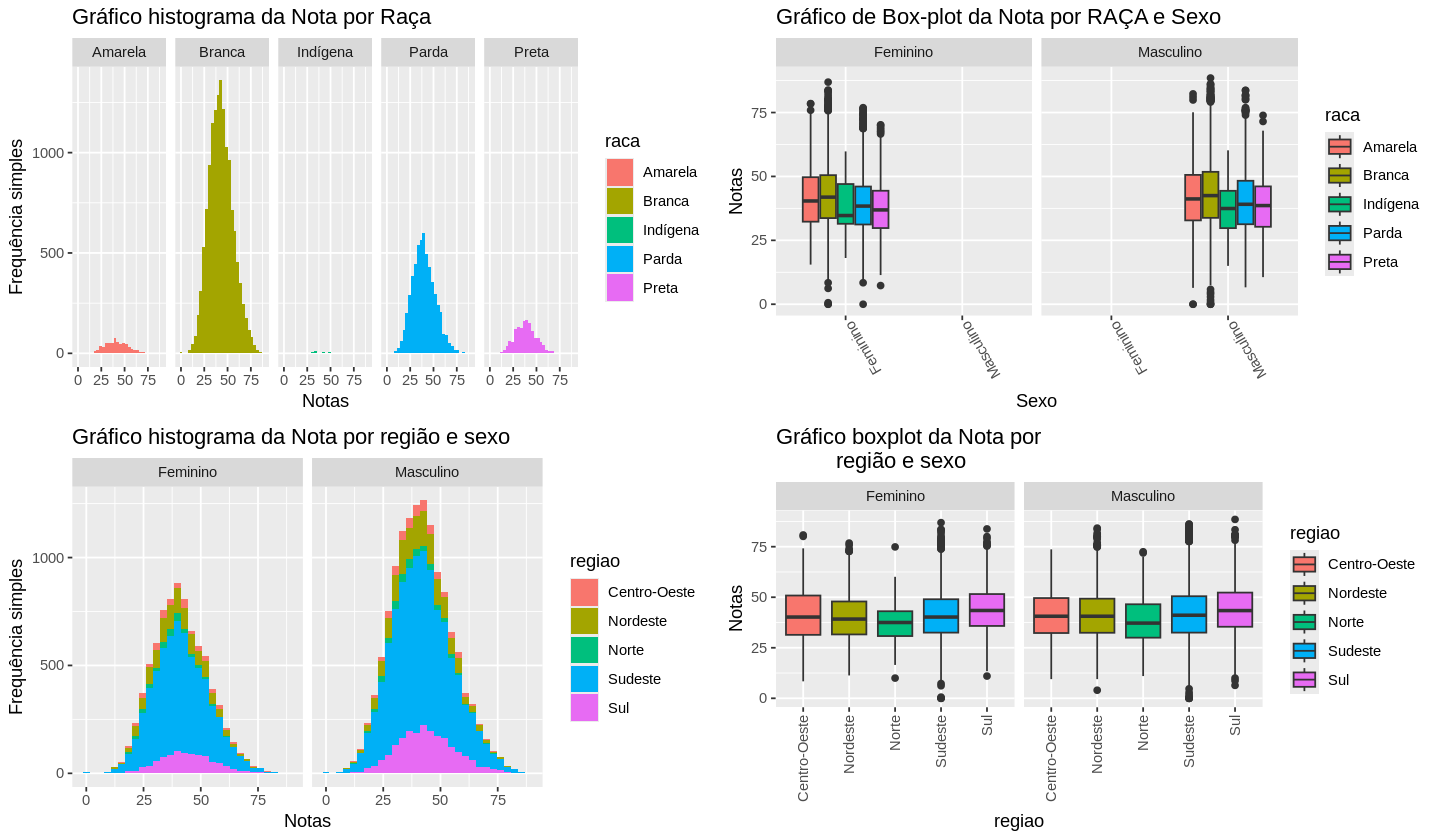

In [ ]:
grid.arrange( grafico_histograma1,
              grafico_boxplot1,
              grafico_histograma2,
              grafico_boxplot2,
              nrow=2,ncol=2)

*10/06/2025 - (Alinhamento do grupo)*
# Definição: Organizar as pergintas conforme o documento, responder o doc >>>> Gabriela
# Escolher uma distribuição de Probabilidade e mostrar a aplicação do teorema central do limite: (TCL) >>>>>> Filipe
# Fabiano R seguir >>>> instalação / conhecimento